In [10]:
#Definición de los paquetes
import numpy as np
from numba import njit, prange
import numpy.random as rnd
from scipy.optimize import fsolve, minimize
import pandas as pd
from tqdm import tqdm
from numba import njit, prange
from scipy.stats import norm
import hawkesbook as hb
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numba import njit, prange

@njit(nogil=True, parallel=True)
def em_responsibilities(𝐭, 𝛉):
    λ, α, β = 𝛉

    N = len(𝐭)
    resp = np.empty((N,N), dtype=np.float64)

    for i in prange(0,N):
        if i == 0:
            resp[i, 0] = 1.0
            for j in range(1, N):
                resp[i, j] = 0.0
        else:
            resp[i, 0] = λ
            rowSum = λ

            for j in range(1, i+1):
                resp[i, j] = α*np.exp(-β*(𝐭[i] - 𝐭[j-1]))
                rowSum += resp[i, j]

            for j in range(0, i+1):
                resp[i, j] /= rowSum

            for j in range(i+1, N):
                resp[i, j] = 0.0
    return resp


In [3]:
@njit()
def exp_log_likelihood(tiempos, T, 𝛉):
    λ, α, β = 𝛉
    𝐭 = tiempos
    N_T = len(𝐭)

    A = np.empty(N_T, dtype=np.float64)
    A[0] = 0
    #funcion recursiva para calcular A[i] prara cada llegada
    
    for i in range(1, N_T):
        A[i] = np.exp(-β*(𝐭[i] - 𝐭[i-1])) * (1 + A[i-1])

    ℓ = -λ*T
    for i, t_i in enumerate(tiempos):
        ℓ += np.log(λ + α * A[i]) - (α/β) * (1 - np.exp(-β*(T-t_i)))
    return ℓ

In [8]:
quakes.index

DatetimeIndex(['2015-01-01 05:01:10', '2015-01-01 06:56:58',
               '2015-01-01 12:04:49', '2015-01-01 13:57:14',
               '2015-01-01 16:14:08', '2015-01-02 01:51:44',
               '2015-01-03 18:51:13', '2015-01-03 21:08:41',
               '2015-01-03 22:22:57', '2015-01-04 01:15:37',
               ...
               '2019-12-29 18:17:50', '2019-12-30 00:32:52',
               '2019-12-30 04:11:10', '2019-12-30 04:32:31',
               '2019-12-30 06:22:42', '2019-12-30 14:36:56',
               '2019-12-30 18:43:36', '2019-12-31 17:10:14',
               '2019-12-31 17:41:12', '2019-12-31 19:02:55'],
              dtype='datetime64[ns]', length=6054, freq=None)

In [13]:
ts

array([2.09143519e-01, 2.89560185e-01, 5.03344907e-01, ...,
       1.82571544e+03, 1.82573694e+03, 1.82579369e+03])

In [16]:
pd.DataFrame(em_responsibilities(ts,np.array([1,2,3])))

,0,1,2,3,4,5,6,7,8,9,...,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.388910,0.611090,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.347154,0.287238,0.365608,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.245681,0.160835,0.204717,0.388767,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.207807,0.102283,0.130190,0.247237,0.312483,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6049,0.288096,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.028838,0.045452,0.099282,0.156454,0.163570,0.205776,0.000000,0.000000,0.000000,0.000000
6050,0.272151,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.016295,0.025683,0.056100,0.088405,0.092426,0.116275,0.325582,0.000000,0.000000,0.000000
6051,0.779607,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.002823,0.004449,0.009719,0.015316,0.016012,0.020144,0.056405,0.094297,0.000000,0.000000
6052,0.318463,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.001081,0.001704,0.003722,0.005865,0.006132,0.007715,0.021602,0.036113,0.597133,0.000000


In [50]:
T=max(ts)
T

1825.7936921296296

In [56]:
exp_em_iter(𝐭s, T, np.array([1.0,2.0,3.0]),calcLikelihoods=False)

(array([1.21787561, 1.89898344, 2.73420643]),
 0.0,
 2016.8331566703707,
 1400.7474826206912)

In [39]:
theta=np.array([1,2,3])

In [53]:
lambda_=theta[0]
alpha=theta[1]
beta_=theta[2]

t=ts

In [41]:
np.sum(1 - np.exp(-beta_*(T - 𝐭)))/beta_ - np.sum((T - 𝐭)*np.exp(-beta_*(T - 𝐭)))

2028.9531764890653

In [33]:
np.sum(1 - np.exp(-beta_*(T - 𝐭)))

6024.29782397864

In [35]:
sum(beta_*(T - 𝐭))

17457359.996006984

In [42]:
np.sum(1 - np.exp(-beta_*(T - 𝐭)))/beta_

2008.0992746595466

In [51]:
np.sum((T - 𝐭)*np.exp(-beta_*(T - 𝐭)))

0.2515112653104172

In [46]:
np.sum((T - t)*np.exp(-beta_*(T - t)))

-20.853901829518577

In [28]:
ts
T=max(ts)
𝛉=np.array([1,2,3])

In [31]:
em_responsibilities(𝐭, 𝛉)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54012188, 0.45987812, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45304105, 0.25153445, 0.2954245 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6696502 , 0.        , 0.        , ..., 0.1031755 , 0.        ,
        0.        ],
       [0.41144609, 0.        , 0.        , ..., 0.06072434, 0.39412524,
        0.        ],
       [0.31548878, 0.        , 0.        , ..., 0.04156649, 0.26978315,
        0.28163946]])

NameError: name 'np' is not defined

In [15]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [11]:
quakes = pd.read_csv("D:/Hawkes Process/sismos japon.csv")
quakes.index = pd.to_datetime(quakes.Day.astype(str) + "/" + quakes.Month.astype(str) + "/" + quakes.Year.astype(str) + " " + quakes.Time, dayfirst=True)
quakes.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
timeToQuake = quakes.index - pd.Timestamp("1/1/2015")
ts = np.array(timeToQuake.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
obsPeriod = pd.Timestamp("31/12/2019") - pd.Timestamp("1/1/2015")
T = obsPeriod.days
𝛉=np.array([1,2,3])

In [169]:
import numpy as np
from numba import njit, prange
import numpy.random as rnd
from scipy.optimize import fsolve, minimize

t=ts # tiempos de arribo 

λ_hist=[]
α_hist=[]
β_hist=[]

𝛉=np.array([1 ,2 ,3]) 

for i in range (0,100):#numero de iteraciones
    λ, α, β = 𝛉
    N = len(𝐭)
    
    λ_hist.append(λ)
    α_hist.append(α)
    β_hist.append(β)

    # Paso E
    resp = em_responsibilities(𝐭, 𝛉)

    # Paso M 
    λ = np.sum(resp[:,0])/T #calcula lambda

    numer = np.sum(resp[:,1:])
    denom = np.sum(1 - np.exp(-β*(T - 𝐭)))
    denom2 = 0
    for j in prange(1, N):
        denom2 += np.sum((𝐭[j] - 𝐭[:j])*resp[j,1:j+1])

    func = lambda β : β*numer/denom*(np.sum(1 - np.exp(-β*(T - 𝐭)))/β - np.sum((T - 𝐭)*np.exp(-β*(T - 𝐭))))/denom2- β

    beta_initial_guess = 5
    beta_solution = fsolve(func,beta_initial_guess)
    
    α=beta_solution[0]*numer/denom #se calcula una vez que se ha calculado beta
    𝛉=np.array([λ,α,beta_solution[0]])

In [170]:
𝛉

array([2.06894193, 1.27888911, 3.37717583])

In [161]:
denom2

329.09288204826294

In [171]:
β=3.37717583
func(β)

-1.872475063890988e-09

In [130]:
pd.DataFrame(em_responsibilities(𝐭, 𝛉)).to_csv("D:/Hawkes Process/prueba.csv")

KeyboardInterrupt: 

In [133]:
pd.DataFrame(em_responsibilities(𝐭, 𝛉)).sum(axis=0)

0        4928.517551
1           1.437322
2           1.316825
3           1.127591
4           1.021587
            ...     
21217       0.353668
21218       0.263167
21219       0.193762
21220       0.108871
21221       0.118723
Length: 21222, dtype: float64

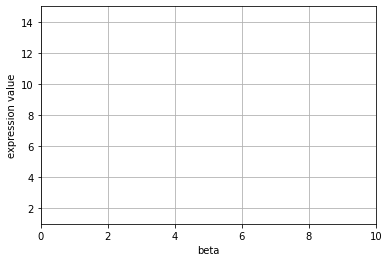

In [139]:
plt.plot(β, func(β))
plt.xlabel("beta")
plt.ylabel("expression value")
plt.axis([0, 10, 1, 15])
plt.grid()
plt.show()

In [30]:
𝛉

array([1, 1, 2])

In [140]:
func = lambda x : x+2

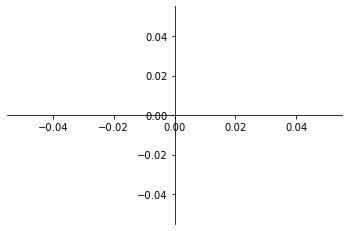

In [150]:
import warnings
β = np.linspace(-5,5,6054)

# the function, which is y = x^2 here


# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(β,y, 'r')

# show the plot
plt.show()

In [163]:
warnings.filterwarnings('ignore')

y = np.exp(β)

In [164]:
y

array([6.73794700e-03, 6.74908778e-03, 6.76024699e-03, ...,
       1.47923590e+02, 1.48168172e+02, 1.48413159e+02])

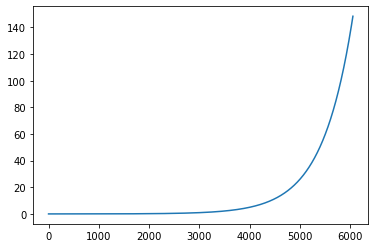

In [165]:
plt.plot(y)

In [160]:
β*numer/denom*(np.sum(1 - np.exp(-β*(T - 𝐭)))/β - np.sum((T - 𝐭)*np.exp(-β*(T - 𝐭))))/denom2- β

array([ nan,  nan,  nan, ..., -inf, -inf, -inf])

# Aplicación Sismos México

In [4]:
terremotos = pd.read_csv("D:/Hawkes Process/Base de datos Sismos 2020 2 S.csv")

#terremotos = pd.read_csv("D:/Hawkes Process/Sismos base de datos final sismos mayores a 3.9.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

In [5]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("7/01/2020")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = max(ts)

In [123]:
pd.Timestamp("7/01/2020")

Timestamp('2020-07-01 00:00:00')

In [124]:
ts

array([1.65393519e-02, 3.71180556e-02, 3.97800926e-02, ...,
       1.83981620e+02, 1.83981817e+02, 1.83999780e+02])

In [125]:
terremotos.head()

,Fecha,Fecha_formato_R,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Estado,D,M,A
2020-07-01 00:23:49,01/07/2020,2020-07-01,00:23:49,3.2,19.0503,-103.3690,40.7,"37 km al NOROESTE de COALCOMAN, MICH",01/07/2020,05:23:49,revisado,MICH,1,7,2020
2020-07-01 00:53:27,01/07/2020,2020-07-01,00:53:27,3.5,16.8433,-99.5525,13.3,"18 km al NOROESTE de SAN MARCOS, GRO",01/07/2020,05:53:27,revisado,GRO,1,7,2020
2020-07-01 00:57:17,01/07/2020,2020-07-01,00:57:17,3.9,16.2298,-96.0767,64.3,"51 km al NORTE de CRUCECITA, OAX",01/07/2020,05:57:17,revisado,OAX,1,7,2020
2020-07-01 01:03:44,01/07/2020,2020-07-01,01:03:44,1.9,19.3512,-99.1605,7,"menos de 1 km al NORESTE de COYOACAN, CDMX",01/07/2020,06:03:44,revisado,CDMX,1,7,2020
2020-07-01 01:18:00,01/07/2020,2020-07-01,01:18:00,3.3,16.7543,-99.4112,29.3,"5 km al SUROESTE de SAN MARCOS, GRO",01/07/2020,06:18:00,revisado,GRO,1,7,2020


In [126]:
len(ts)

11172

In [6]:
t=ts

λ_hist=[]
α_hist=[]
β_hist=[]

𝛉=np.array([100,200,300]) # Parametros iniciales

λ_hist.append(𝛉[0])
α_hist.append(𝛉[1])
β_hist.append(𝛉[2])

for i in range (0,1500):
    λ, α, β = 𝛉
    N = len(𝐭)

    # E step
    resp = em_responsibilities(𝐭, 𝛉)

    # M step: Update λ
    λ = np.sum(resp[:,0])/T

    numer = np.sum(resp[:,1:])
    denom = np.sum(1 - np.exp(-β*(T - 𝐭)))
    denom2 = 0
    for j in prange(1, N):
        denom2 += np.sum((𝐭[j] - 𝐭[:j])*resp[j,1:j+1])

    func = lambda β : β*numer/denom*(np.sum(1 - np.exp(-β*(T - 𝐭)))/β - np.sum((T - 𝐭)*np.exp(-β*(T - 𝐭))))/denom2- β

    beta_initial_guess = β
    beta_solution = fsolve(func,beta_initial_guess)
    
    α=beta_solution[0]*numer/denom
    𝛉=np.array([λ,α,beta_solution[0]])
    λ_hist.append(λ)
    α_hist.append(α)
    β_hist.append(β)
    

In [7]:
#second and posterior runs 
v1=𝛉[0]
v2=𝛉[1]
v3=𝛉[2]

𝛉=np.array([v1 ,v2 ,v3])
for i in range (0,500):
    λ, α, β = 𝛉
    N = len(𝐭)

    # E step
    resp = em_responsibilities(𝐭, 𝛉)

    # M step: Update λ
    λ = np.sum(resp[:,0])/T

    numer = np.sum(resp[:,1:])
    denom = np.sum(1 - np.exp(-β*(T - 𝐭)))
    denom2 = 0
    for j in prange(1, N):
        denom2 += np.sum((𝐭[j] - 𝐭[:j])*resp[j,1:j+1])

    func = lambda β : β*numer/denom*(np.sum(1 - np.exp(-β*(T - 𝐭)))/β - np.sum((T - 𝐭)*np.exp(-β*(T - 𝐭))))/denom2- β

    beta_initial_guess = β
    beta_solution = fsolve(func,beta_initial_guess)
    
    α=beta_solution[0]*numer/denom
    𝛉=np.array([λ,α,beta_solution[0]])
    λ_hist.append(λ)
    α_hist.append(α)
    β_hist.append(β)


In [130]:
pd.DataFrame(em_responsibilities(𝐭, 𝛉)).tail()

,0,1,2,3,4,5,6,7,8,9,...,11162,11163,11164,11165,11166,11167,11168,11169,11170,11171
11167,0.617880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025455,0.026187,0.030748,0.035352,0.041644,0.048812,0.000000,0.000000,0.000000,0.00000
11168,0.681792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018398,0.018928,0.022225,0.025552,0.030100,0.035281,0.042012,0.000000,0.000000,0.00000
11169,0.655234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016590,0.017068,0.020040,0.023041,0.027142,0.031813,0.037883,0.057833,0.000000,0.00000
11170,0.617691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015607,0.016056,0.018852,0.021675,0.025532,0.029927,0.035637,0.054404,0.057984,0.00000
11171,0.629819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013118,0.013495,0.015846,0.018218,0.021461,0.025155,0.029954,0.045728,0.048737,0.04884


In [8]:
𝛉

array([39.66394642,  3.73123481, 10.75374396])

In [9]:
len(λ_hist)

λ_hist

[100,
 48.4621513187779,
 50.77645677936972,
 52.08484033938306,
 52.920977947557574,
 53.49512311483903,
 53.9077502858019,
 54.21324549959274,
 54.443746614247445,
 54.619527589082935,
 54.75404390491251,
 54.85659598228197,
 54.933830061382785,
 54.99062988930058,
 55.03067015889295,
 55.05677288552593,
 55.071144213930495,
 55.0755361033605,
 55.07135936968704,
 55.05976438628585,
 55.04169977450441,
 55.017955800236564,
 54.98919694414814,
 54.95598667867319,
 54.91880654946623,
 54.87807103659801,
 54.834139249033434,
 54.787324215345194,
 54.73790033032008,
 54.68610937287353,
 54.63216540700975,
 54.57625880214207,
 54.51855955360513,
 54.459220042949404,
 54.39837734665571,
 54.33615517846439,
 54.272665532608634,
 54.20801008145562,
 54.14228137036649,
 54.075563844234246,
 54.007934733590886,
 53.93946482297993,
 53.87021912015518,
 53.800257441357296,
 53.72963492525901,
 53.65840248601666,
 53.58660721411917,
 53.51429273229867,
 53.44149951260011,
 53.36826515974493,
 53.

In [10]:
ℓ_hist=[]
for i in range (0, len(λ_hist)):
    ℓ_hist.append(exp_log_likelihood(ts, T, np.array([λ_hist[i] ,α_hist[i] ,β_hist[i]])))
    

In [11]:
df_ℓ_hist=pd.DataFrame(ℓ_hist)
df_ℓ_hist.rename(columns = {0:'log_verosimilitud'}, inplace = True)
df_λ_hist=pd.DataFrame(λ_hist)
df_λ_hist.rename(columns = {0:'lambda'}, inplace = True)
df_α_hist=pd.DataFrame(α_hist)
df_α_hist.rename(columns = {0:'alpha'}, inplace = True)
df_β_hist=pd.DataFrame(β_hist)
df_β_hist.rename(columns = {0:'beta'}, inplace = True)
pd_evolution=pd.concat([df_ℓ_hist,df_λ_hist,df_α_hist,df_β_hist], axis=1)

In [12]:
pd_evolution

,log_verosimilitud,lambda,alpha,beta
0,28760.601314,100.000000,200.000000,300.000000
1,34509.730172,48.462151,47.243562,300.000000
2,34620.076963,50.776457,32.781372,234.041362
3,34668.017331,52.084840,25.379837,200.202832
4,34693.029056,52.920978,20.923446,178.491839
...,...,...,...,...
1996,34796.543730,39.663946,3.731235,10.753744
1997,34796.543730,39.663946,3.731235,10.753744
1998,34796.543730,39.663946,3.731235,10.753744
1999,34796.543730,39.663946,3.731235,10.753744


In [13]:
pd_evolution.to_csv("D:/Hawkes Process/log_likelihood_starting_parameters sim 2020 2s param 3 2000.csv")

In [ ]:
exp_hawkes_intensity()

In [ ]:
terremotos = pd.read_csv("D:/Hawkes Process/Sismos base de datos final2.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

In [ ]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("8/19/2017")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = max(ts)
𝛉=np.array([1,2,3])

In [ ]:
exp_log_likelihood

In [76]:
exp_log_likelihood(ts, T, np.array([6 ,3.1 ,3.6]))

17465.55505042898

In [77]:
exp_log_likelihood(ts, T, 𝛉)

17467.245144920314

In [82]:
exp_log_likelihood(ts, T, np.array([5.476818695613594 ,3.04433744705703 ,3.569827597566426]))

17467.245108342056

In [83]:
𝛉
 

array([5.47645282, 3.04413509, 3.56954858])

In [2]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt

In [8]:
x =  np.random.default_rng().exponential(scale=1, size=100000)

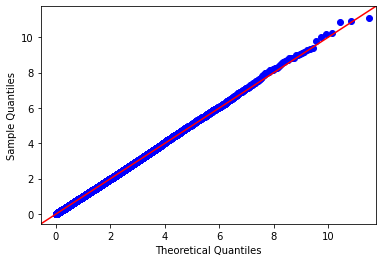

In [9]:
qqplot(x, dist=stats.expon, fit=False, line="45")
plt.show()

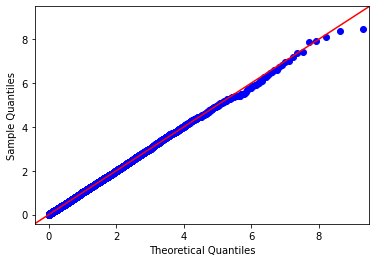

In [128]:
tsShifted = hb.exp_hawkes_compensators(ts, 𝛉)
iat = np.diff(np.insert(tsShifted, 0, 0))
qqplot(iat, dist=stats.expon, fit=False, line="45")
plt.show()
   

In [132]:
hb.exp_hawkes_compensators(ts, 𝛉)

array([6.56016433e-01, 1.54113111e+00, 1.66435791e+00, ...,
       1.11708129e+04, 1.11708256e+04, 1.11720000e+04])

In [131]:
hb.exp_hawkes_compensators(ts, 𝛉)


iat = np.diff(np.insert(tsShifted, 0, 0))
iat

array([0.65601643, 0.88511467, 0.1232268 , ..., 0.36274556, 0.01263966,
       1.17443103])

In [80]:
β_hist

[3.6,
 3.6010687081413115,
 3.6019968954272543,
 3.602795472964371,
 3.6034745504309393,
 3.604043495928966,
 3.6045109911497066,
 3.604885082249009,
 3.6051732267917607,
 3.6053823370907074,
 3.6055188202356896,
 3.6055886150822074,
 3.605597226444361,
 3.605549756715724,
 3.605450935122105,
 3.6053051447926148,
 3.6051164478199187,
 3.604888608465505,
 3.6046251146536084,
 3.604329197885043,
 3.6040038516913966,
 3.6036518487409643,
 3.6032757566977787,
 3.602877952927988,
 3.6024606381398003,
 3.6020258490365653,
 3.601575470056279,
 3.601111244265386,
 3.6006347834691064,
 3.600147577595884,
 3.599651003409442,
 3.5991463325973787,
 3.5986347392817546,
 3.5981173069939296,
 3.597595035152356,
 3.597068845079133,
 3.596539585589129,
 3.5960080381818567,
 3.595474921865265,
 3.5949408976373554,
 3.594406572650417,
 3.5938725040806196,
 3.5933392027238376,
 3.5928071363373273,
 3.5922767327453546,
 3.591748382725439,
 3.591222442690973,
 3.590699237184598,
 3.5901790611955837,
 3.5896

# Simulación tiempos de arribo

In [310]:
#terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-10 oct 2017 todas magnitudes.csv")
#terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-15 may 2023 magnitudes m o igual 4.csv")
terremotos = pd.read_csv("D:/Hawkes Process/Base de datos Sismos 2020 2 S.csv")

terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

In [314]:
import math
# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
#tiempo_inter_terremoto = terremotos.index - pd.Timestamp("8/01/2017")
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("7/01/2020")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = math.floor(max(ts))+1

In [315]:
#𝛉1=np.array([7.2111, 6.3288,6.7116])

#𝛉2=np.array([1.5653, 0.7687,0.9612])

𝛉3=np.array([39.6639,3.7312,10.7537])
T=math.floor(max(ts))+1


In [316]:
my_df  = pd.DataFrame()
for x in range(0,200):
    simular_sismos_3=hb.exp_simulate_by_thinning(𝛉3,T)
    tiempos_simulados_convertidos=[]
    m_simulado=[]
    d_simulado=[]
    a_simulado=[]
    fecha_simulada=[]
    for x in range(0,len(simular_sismos_3)):
        tiempos_simulados_convertidos.append(pd.Timestamp("7/01/2020")+ datetime.timedelta(days=simular_sismos_3[x]))
        d_simulado.append(tiempos_simulados_convertidos[x].day)
        m_simulado.append(tiempos_simulados_convertidos[x].month)
        a_simulado.append(tiempos_simulados_convertidos[x].year)
        fecha_simulada.append(datetime.datetime(a_simulado[x], m_simulado[x], d_simulado[x]).date())
    
    t_simulados=pd.DataFrame(tiempos_simulados_convertidos)
    t_simulados.rename(columns = {0:'t_simulados'}, inplace = True)
    d_simulado=pd.DataFrame(d_simulado)
    d_simulado.rename(columns = {0:'d_simulado'}, inplace = True)
    m_simulado=pd.DataFrame(m_simulado)
    m_simulado.rename(columns = {0:'m_simulado'}, inplace = True)
    a_simulado=pd.DataFrame(a_simulado)
    a_simulado.rename(columns = {0:'a_simulado'}, inplace = True)
    fecha_simulada=pd.DataFrame(fecha_simulada)
    fecha_simulada.rename(columns = {0:'fecha_simulada'}, inplace = True)
    panda_simulado=pd.concat([fecha_simulada], axis=1)
    my_df=pd.concat([my_df,panda_simulado],axis=1)
    

In [317]:
my_df

,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,...,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada
0,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
1,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
2,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
3,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
4,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
#panda_simulado.to_csv("D:/Hawkes Process/Tiempos De llegada Simulados 4 grados.csv")
my_df.to_csv("D:/Hawkes Process/Tiempos De llegada Simulados 2022.csv")


# Simulación tiempos de llegada

In [5]:
import random

In [4]:
@njit(nogil=True)
def exp_simulate_by_thinning(𝛉, T):
    λ, α, β = 𝛉
    rnd.seed(100)
    λˣ = λ
    times = []

    t = 0

    while True:
        M = λˣ
        Δt = rnd.exponential() / M
        t += Δt
        if t > T:
            break

        λˣ = λ + (λˣ - λ) * np.exp(-β * Δt)

        u = M * rnd.rand()
        if u > λˣ:
            continue  # This potential arrival is 'thinned' out

        times.append(t)
        λˣ += α

    return np.array(times)


In [9]:

a=exp_simulate_by_thinning(np.array([4,5,10]),10)
len(a)

74

In [11]:
pd.DataFrame(a).to_csv("D:/Hawkes Process/Tiempos De llegada Simulados parametros 1 alt 4 5 10.csv")


# Matriz Hessiana


In [198]:
import math
#𝛉=np.array([7.2111, 6.3288 ,6.7116])
#𝛉=np.array([1.5653, 0.7687 ,0.9612])

𝛉=np.array([39.6639, 3.7312 ,10.7537])


In [208]:
#terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-15 may 2023 magnitudes m o igual 4.csv")
terremotos = pd.read_csv("D:/Hawkes Process/Base de datos Sismos 2020 2 S.csv")

terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("7/01/2020")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = math.floor(max(ts))+1

In [209]:
#Entrada 1-1 de la matriz Hessiana
def d2lambda_lambda (lambda_,vec_z_i_0): 
    res=  -1/(lambda_**2) *vec_z_i_0.sum()
    return res

In [210]:
#Entrada 2-2 de la matriz Hessiana
def d2alpha_alpha(alpha, vec_z_i_j):
    res= -1/(alpha**2)*vec_z_i_j.sum()
    return res

In [211]:
import math
#Para la obtención de los términos de los sumandos de la segunda derivada parcial 
def aux_d2 (β,tiempos,key): #Key es un parámetro que sirve para especificar el cálculo
    aux = []
    T=math.floor(tiempos.max())+1
    if key==1:
        for x in range (0,len(tiempos)):
            num= 1-np.exp(-β*(T-tiempos.iloc[x]))
            aux.append(num)
        aux=pd.DataFrame(aux)
    if key==2:
        for x in range (0,len(tiempos)):
            num= np.exp(-β*(T-tiempos.iloc[x]))*(T-tiempos.iloc[x])
            aux.append(num)
        aux=pd.DataFrame(aux)
        
    if key==3:
        for x in range (0,len(tiempos)):
            num= np.exp(-β*(T-tiempos.iloc[x]))*(T-tiempos.iloc[x])**2
            aux.append(num)
        aux=pd.DataFrame(aux)
    
    return aux.sum()
    


In [212]:
#Entrada 3-3 de la matriz Hessiana
def d2beta_beta(alpha,beta,tiempos):
    T=tiempos.max()
    sum1=-2*alpha/(beta**3)*aux_d2(beta,tiempos,1)
    sum2=2*alpha/(beta**2)*aux_d2(beta,tiempos,2)
    sum3=alpha/beta*aux_d2(beta,tiempos,3)
    
    res= sum1+sum2+sum3
    return res

In [213]:
#Entrada 1-2 y 2-1  3-1 y 1-3  por simetría de la matriz Hessiana
def d2lambda_alpha_beta():
    return 0


In [214]:
#Entrada 2-3 y 3-2 de la matriz Hessiana por simetría
def d2alpha_beta(beta,tiempos):
    res=1/(beta**2)*aux_d2(beta,tiempos,1)-1/beta*aux_d2(beta,tiempos,2)
    return res


In [215]:
s=em_responsibilities(ts,𝛉)
df = pd.DataFrame(s)
df1=df[[0]]
df1


,0
0,1.000000
1,0.929891
2,0.858602
3,0.802191
4,0.765563
...,...
11167,0.617881
11168,0.681793
11169,0.655235
11170,0.617692


In [216]:
ts

array([1.65393519e-02, 3.71180556e-02, 3.97800926e-02, ...,
       1.83981620e+02, 1.83981817e+02, 1.83999780e+02])

In [217]:
df = pd.DataFrame(s)


In [218]:
df = df.drop(0, axis=1)
df=df.iloc[1:]

In [219]:
df=df.to_numpy() #Volverlo vector debe ser objeto de tipo numpy

In [220]:
#Elementos de la parte triangular inferior de la matriz con -1 porque la primera columna son los zi0
#Elementos de la parte triangular inferior de la matriz con -1 porque la primera columna son los zi0
lower_triangle= pd.DataFrame(df[np.tril_indices(len(ts)-1)])
lower_triangle_index=pd.DataFrame(np.tril_indices(len(ts)-1)[0])
lower_triangle_index.rename(columns = {0:'index'}, inplace = True)

In [221]:
lower_triangle_index.rename(columns = {0:'index'}, inplace = True)

In [222]:
lower_triangle_index[['index']]=lower_triangle_index[['index']]#+1

In [223]:

lower_triangle_index


,index
0,0
1,1
2,1
3,2
4,2
...,...
62401201,11170
62401202,11170
62401203,11170
62401204,11170


In [224]:
data_final_index = pd.concat([pd.DataFrame(lower_triangle),pd.DataFrame(lower_triangle_index)], axis=1)
data_final_index

,0,index
0,0.070109,0
1,0.062908,1
2,0.078490,1
3,0.056011,2
4,0.069884,2
...,...,...
62401201,0.025154,11170
62401202,0.029954,11170
62401203,0.045728,11170
62401204,0.048737,11170


In [225]:
ts=pd.DataFrame(ts)
ts['index'] = ts.index

In [226]:
#para obtener los tiempos de cada z_i_j 
prev= data_final_index.merge(ts,how="left",on="index")
result= prev[['0_y']]

In [227]:
# Se unen los tiempos z_ij a su respectiva probabilidad
result=pd.DataFrame(result)
result=result.reset_index()
result.rename(columns = {'0_y':'tiempos'}, inplace = True)
data_final_z_i_j = pd.concat([result,lower_triangle], axis=1).drop(['index'],axis=1)
data_final_z_i_j.rename(columns = {0:'z_ij'}, inplace = True)

In [228]:
data_final_z_i_j

,tiempos,z_ij
0,0.016539,0.070109
1,0.037118,0.062908
2,0.037118,0.078490
3,0.039780,0.056011
4,0.039780,0.069884
...,...,...
62401201,183.981817,0.025154
62401202,183.981817,0.029954
62401203,183.981817,0.045728
62401204,183.981817,0.048737


In [229]:
ts

,0,index
0,0.016539,0
1,0.037118,1
2,0.039780,2
3,0.044259,3
4,0.054167,4
...,...,...
11167,183.936354,11167
11168,183.975694,11168
11169,183.981620,11169
11170,183.981817,11170


In [230]:
df

array([[0.07010948, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06290782, 0.07848972, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05601076, 0.0698843 , 0.07191377, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05783284, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05440397, 0.05798375,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04572805, 0.04873695,
        0.04884018]])

In [231]:
#Obtenemos los valores de las z_i0 (son los elementos de la diagonal y les asignamos los respectivos tiempos)
diagonal = df1
ts.rename(columns = {0:'tiempos'}, inplace = True)
data_final_z_i_0 = pd.concat([ts,diagonal], axis=1)
data_final_z_i_0.rename(columns = {0:'z_i0'}, inplace = True)

In [232]:
data_final_z_i_0

,tiempos,index,z_i0
0,0.016539,0,1.000000
1,0.037118,1,0.929891
2,0.039780,2,0.858602
3,0.044259,3,0.802191
4,0.054167,4,0.765563
...,...,...,...
11167,183.936354,11167,0.617881
11168,183.975694,11168,0.681793
11169,183.981620,11169,0.655235
11170,183.981817,11170,0.617692


# Prueba Poisson Homogeneo

In [37]:
#norm.ppf(.5)
quakes = pd.read_csv("D:/Hawkes Process/tiempos_poisson_homogeneo.csv")
quakes.sort_index(inplace=True)
ts = np.array(quakes['Tarribo'])

In [5]:
ts
T=max(ts)

In [6]:
ts

array([6.58276064e-01, 9.07357546e-01, 9.26239298e-01, ...,
       7.49800459e+03, 7.49806961e+03, 7.49967088e+03])

In [13]:
t=ts

λ_hist=[]
α_hist=[]
β_hist=[]

𝛉=np.array([1.978810924,0.0001,1.533764894])

λ_hist.append(𝛉[0])
α_hist.append(𝛉[1])
β_hist.append(𝛉[2])

for i in range (0,2000):
    λ, α, β = 𝛉
    N = len(𝐭)

    # E step
    resp = em_responsibilities(𝐭, 𝛉)

    # M step: Update λ
    λ = np.sum(resp[:,0])/T

    numer = np.sum(resp[:,1:])
    denom = np.sum(1 - np.exp(-β*(T - 𝐭)))
    denom2 = 0
    for j in prange(1, N):
        denom2 += np.sum((𝐭[j] - 𝐭[:j])*resp[j,1:j+1])

    func = lambda β : β*numer/denom*(np.sum(1 - np.exp(-β*(T - 𝐭)))/β - np.sum((T - 𝐭)*np.exp(-β*(T - 𝐭))))/denom2- β

    beta_initial_guess = β
    beta_solution = fsolve(func,beta_initial_guess)
    
    α=beta_solution[0]*numer/denom
    𝛉=np.array([λ,α,beta_solution[0]])
    λ_hist.append(λ)
    α_hist.append(α)
    β_hist.append(β)
    

KeyboardInterrupt: 

In [14]:
α_hist

[0.0001,
 0.00010197034043613955,
 0.00010269479214561045,
 0.00010342386461439596,
 0.00010415758214413167,
 0.0001048959691921467,
 0.00010563905037250888,
 0.00010638685045706673,
 0.00010713939437648856,
 0.0001078967072212947,
 0.00010865881424288835,
 0.00010942574085458047,
 0.00011019751263261363,
 0.00011097415531717915,
 0.00011175569481343482,
 0.0001125421571925198,
 0.00011333356869255891,
 0.00011412995571966586,
 0.0001149313448489618,
 0.00011573776282556337,
 0.00011654923656558065,
 0.00011736579315712267,
 0.00011818745986127971,
 0.0001190142641131221,
 0.00011984623352268935,
 0.00012068339587597024,
 0.00012152577913589518,
 0.00012237341144331895,
 0.00012322632111800243,
 0.00012408453665959063,
 0.00012494808674859423,
 0.00012581700024737332,
 0.00012669130620110157,
 0.000127571033838751,
 0.00012845621257406799,
 0.00012934687200654512,
 0.00013024304192239507]

In [101]:
#second and posterior runs 
v1=𝛉[0]
v2=𝛉[1]
v3=𝛉[2]

𝛉=np.array([v1 ,v2 ,v3])
for i in range (0,300):
    λ, α, β = 𝛉
    N = len(𝐭)

    # E step
    resp = em_responsibilities(𝐭, 𝛉)

    # M step: Update λ
    λ = np.sum(resp[:,0])/T

    numer = np.sum(resp[:,1:])
    denom = np.sum(1 - np.exp(-β*(T - 𝐭)))
    denom2 = 0
    for j in prange(1, N):
        denom2 += np.sum((𝐭[j] - 𝐭[:j])*resp[j,1:j+1])

    func = lambda β : β*numer/denom*(np.sum(1 - np.exp(-β*(T - 𝐭)))/β - np.sum((T - 𝐭)*np.exp(-β*(T - 𝐭))))/denom2- β

    beta_initial_guess = β
    beta_solution = fsolve(func,beta_initial_guess)
    
    α=beta_solution[0]*numer/denom
    𝛉=np.array([λ,α,beta_solution[0]])
    λ_hist.append(λ)
    α_hist.append(α)
    β_hist.append(β)


In [30]:
len(𝐭)

15027

In [106]:
exp_log_likelihood(ts, T,𝛉 )

-4582.950463734215

In [111]:
λ, α, β = 𝛉
𝐭 = ts
N_T = len(𝐭)

In [112]:


A = np.empty(N_T, dtype=np.float64)
A[0] = 0
    #funcion recursiva para calcular A[i] prara cada llegada
    
for i in range(1, N_T):
    A[i] = np.exp(-β*(𝐭[i] - 𝐭[i-1])) * (1 + A[i-1])



In [113]:
A

array([0.        , 0.68049056, 1.63216128, ..., 0.40853749, 1.27387192,
       0.19143803])

In [ ]:
ℓ = -λ*T
for i, t_i in enumerate(tiempos):
    ℓ += np.log(λ + α * A[i]) - (α/β) * (1 - np.exp(-β*(T-t_i)))

In [31]:
ℓ_hist=[]
for i in range (0, len(λ_hist)):
    ℓ_hist.append(exp_log_likelihood(ts, T, np.array([λ_hist[i] ,α_hist[i] ,β_hist[i]])))

In [32]:
df_ℓ_hist=pd.DataFrame(ℓ_hist)
df_ℓ_hist.rename(columns = {0:'log_verosimilitud'}, inplace = True)
df_λ_hist=pd.DataFrame(λ_hist)
df_λ_hist.rename(columns = {0:'lambda'}, inplace = True)
df_α_hist=pd.DataFrame(α_hist)
df_α_hist.rename(columns = {0:'alpha'}, inplace = True)
df_β_hist=pd.DataFrame(β_hist)
df_β_hist.rename(columns = {0:'beta'}, inplace = True)
pd_evolution=pd.concat([df_ℓ_hist,df_λ_hist,df_α_hist,df_β_hist], axis=1)

In [33]:
pd_evolution.to_csv("D:/Hawkes Process/log_likelihood_poisson_simulation2.csv")

# Construcción de la matriz Hessiana

In [233]:
lambda_=𝛉[0]
alpha=𝛉[1]
beta=𝛉[2]

In [234]:
#Las Entradas de la matriz
a11=d2lambda_lambda(lambda_,data_final_z_i_0[['z_i0']]).to_numpy() 
a12=0
a13=0
a21=0
a22=d2alpha_alpha(alpha,data_final_z_i_j[['z_ij']]).to_numpy() 
a23=d2alpha_beta(beta, data_final_z_i_0[['tiempos']]).to_numpy() 
a31=0
a32=d2alpha_beta(beta, data_final_z_i_0[['tiempos']]).to_numpy() 
a33=d2beta_beta(alpha,beta,data_final_z_i_0[['tiempos']]).to_numpy() 

In [235]:
data = np.array([
        [a11[0], a12, a13],
        [a21, a22[0], a23[0]],
        [a31,a32[0],a33[0]]])

In [236]:
data

array([[  -4.63898514,    0.        ,    0.        ],
       [   0.        , -278.25553487,   96.48788317],
       [   0.        ,   96.48788317,  -66.9166163 ]])

In [38]:
@njit()
def ozaki_recursion(𝐭, 𝛉, n):
    """
    Calculate sum_{j=1}^{i-1} t_j^n * exp(-β * (t_i - t_j)) recursively
    """
    λ, α, β = 𝛉
    N_T = len(𝐭)

    A_n = np.empty(N_T, dtype=np.float64)
    A_n[0] = 0
    for i in range(1, N_T):
        A_n[i] = np.exp(-β*(𝐭[i] - 𝐭[i-1])) * (𝐭[i-1]**n + A_n[i-1])

    return A_n

In [94]:
@njit()
def hess_exp_log_likelihood(ℋ_T, T, theta):
    λ=theta[0]
    
    α=theta[1]
    β = theta[2]

    𝐭 = ℋ_T
    N_T = len(𝐭)

    A = ozaki_recursion(𝐭, theta, 0)
    A_1 = ozaki_recursion(𝐭, theta, 1)
    A_2 = ozaki_recursion(𝐭, theta, 2)

    # B is sum (t_i - t_j) * exp(- ...)
    # C is sum (t_i - t_j)**2 * exp(- ...)
    B = np.empty(N_T, dtype=np.float64)
    C = np.empty(N_T, dtype=np.float64)
    B[0] = 0
    C[0] = 0

    for i in range(1, N_T):
        B[i] = 𝐭[i] * A[i] - A_1[i]
        C[i] = 𝐭[i]**2 * A[i] - 2*𝐭[i]*A_1[i] + A_2[i]

    d2ℓdα2 = 0
    d2ℓdαdβ = 0
    d2ℓdβ2 = 0

    d2ℓdλ2 = 0
    d2ℓdαdλ = 0
    d2ℓdβdλ = 0

    for i, t_i in enumerate(ℋ_T):
        d2ℓdα2 += - ( A[i] / (λ + α * A[i]) )**2
        d2ℓdαdβ += - ( (1/β) * (T - t_i) * np.exp(-β*(T-t_i)) \
                     + (1/β**2) * (np.exp(-β*(T-t_i))-1) ) \
                   + ( -B[i]/(λ + α * A[i]) + (α * A[i] * B[i]) / (λ + α * A[i])**2 )

        d2ℓdβ2 += α * ( (1/β) * (T - t_i)**2 * np.exp(-β*(T-t_i)) + \
                        (2/β**2) * (T - t_i) * np.exp(-β*(T-t_i)) + \
                        (2/β**3) * (np.exp(-β*(T-t_i)) - 1) ) + \
                  ( α*C[i] / (λ + α * A[i]) - (α*B[i] / (λ + α * A[i]))**2 )


        d2ℓdλ2 += -1 / (λ + α * A[i])**2
        d2ℓdαdλ += -A[i] / (λ + α * A[i])**2
        d2ℓdβdλ += α * B[i] / (λ + α * A[i])**2

    H = np.empty((3,3), dtype=np.float64)
    H[0,0] = d2ℓdλ2
    H[1,1] = d2ℓdα2
    H[2,2] = d2ℓdβ2
    H[0,1] = H[1,0] = d2ℓdαdλ
    H[0,2] = H[2,0] = d2ℓdβdλ
    H[1,2] = H[2,1] = d2ℓdαdβ
    return H

In [95]:
theta=𝛉
hess_exp_log_likelihood(ts, T, 𝛉)
𝛉[0]

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at <ipython-input-38-2d8589ebd0c2> (6)[0m
[1m
File "<ipython-input-38-2d8589ebd0c2>", line 6:[0m
[1mdef ozaki_recursion(𝐭, 𝛉, n):
    <source elided>
    """
[1m    λ, α, β = 𝛉
[0m    [1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: [1mcannot determine Numba type of <class 'pandas.core.frame.DataFrame'>[0m

This error may have been caused by the following argument(s):
- argument 0: [1mcannot determine Numba type of <class 'pandas.core.frame.DataFrame'>[0m


In [237]:
data

array([[  -4.63898514,    0.        ,    0.        ],
       [   0.        , -278.25553487,   96.48788317],
       [   0.        ,   96.48788317,  -66.9166163 ]])

In [134]:
𝛉[0]

1.5653

In [194]:
data=np.matrix(data)

In [238]:
#La Matriz de Varianzas y Covarianzas
np.sqrt(np.linalg.inv(data)*-1)

array([[0.46428912, 0.        , 0.        ],
       [0.        , 0.08477972, 0.10180319],
       [0.        , 0.10180319, 0.17288085]])

In [239]:
np.linalg.inv(data)*-1

array([[0.21556439, 0.        , 0.        ],
       [0.        , 0.0071876 , 0.01036389],
       [0.        , 0.01036389, 0.02988779]])

In [240]:
len(ts)

11172

# Bondad de Ajuste

In [25]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt

In [23]:
𝛉1=np.array([7.21107992,6.328792109,6.711594306])
terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-10 oct 2017 todas magnitudes.csv")

#terremotos = pd.read_csv("D:/Hawkes Process/Sismos base de datos final sismos mayores a 3.9.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

In [24]:
terremotos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,M,D,A
2017-08-01 00:03:11,2017-08-01,00:03:11,3.3,18.1278,-103.2190,15.0,"72 km al SUR de COALCOMAN, MICH",01/08/2017,05:03:11,revisado,8,1,2017
2017-08-01 00:26:21,2017-08-01,00:26:21,3.9,14.6192,-93.2925,15.4,"101 km al SUROESTE de MAPASTEPEC, CHIS",01/08/2017,05:26:21,revisado,8,1,2017
2017-08-01 01:31:28,2017-08-01,01:31:28,3.7,16.0733,-97.5217,13.1,"12 km al NOROESTE de RIO GRANDE, OAX",01/08/2017,06:31:28,revisado,8,1,2017
2017-08-01 01:47:13,2017-08-01,01:47:13,3.8,15.5057,-93.3508,90.8,"25 km al SUROESTE de PIJIJIAPAN, CHIS",01/08/2017,06:47:13,revisado,8,1,2017
2017-08-01 02:27:43,2017-08-01,02:27:43,3.8,16.3813,-98.2295,20.0,"19 km al OESTE de PINOTEPA NACIONAL, OAX",01/08/2017,07:27:43,revisado,8,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-10 23:22:01,2017-10-10,23:22:01,3.6,16.4822,-94.9965,27.2,"6 km al NORESTE de JUCHITAN DE ZARAGOZA, OAX",11/10/2017,04:22:01,revisado,10,10,2017
2017-10-10 23:27:41,2017-10-10,23:27:41,3.9,15.2203,-94.3027,12.7,"112 km al SUROESTE de TONALA, CHIS",11/10/2017,04:27:41,revisado,10,10,2017
2017-10-10 23:39:47,2017-10-10,23:39:47,3.7,16.3737,-95.1383,62.0,"11 km al NORESTE de S BLAS ATEMPA, OAX",11/10/2017,04:39:47,revisado,10,10,2017
2017-10-10 23:44:27,2017-10-10,23:44:27,4.3,15.1285,-94.4115,16.1,"127 km al SUROESTE de TONALA, CHIS",11/10/2017,04:44:27,revisado,10,10,2017


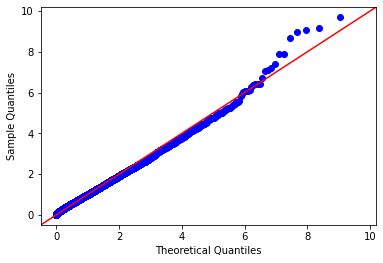

In [25]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("08/01/2017")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = pd.Timestamp("10/11/2017")- pd.Timestamp("08/01/2017")
tsShifted = hb.exp_hawkes_compensators(ts, 𝛉1)
iat = np.diff(np.insert(tsShifted, 0, 0))
qqplot(iat, dist=stats.expon, fit=False, line="45")
plt.show()

<AxesSubplot:xlabel='F_k', ylabel='F_k+1'>

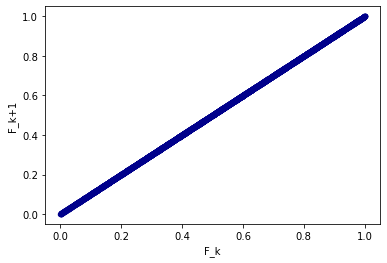

In [26]:
a=pd.DataFrame(((1-np.exp(-iat))))
a.rename(columns = {0:'F_k+1'}, inplace = True)
b=pd.DataFrame(((1-np.exp(-iat))[0:5000-1]))
b.rename(columns = {0:'F_k'}, inplace = True)
df=pd.concat([a,b],axis=1)
df.plot.scatter(x='F_k',
                      y='F_k+1',
                      c='DarkBlue')

In [27]:
a.to_csv("D:/Hawkes Process/Interarrival 2017.csv", index = None)


In [33]:
a

,F_k+1
0,0.999851
1,0.999995
2,1.000000
3,0.999826
4,0.954225
...,...
16490,0.999988
16491,1.000000
16492,0.995568
16493,0.999999


# Test pruebas de ajuste


In [4]:
def poisson_compensator (ts, lambda_):
    lambda_tot=[]
    for x in range(0,len(ts)):
        lambda_tot.append(lambda_*ts[x])
    return lambda_tot


In [11]:
#terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-10 oct 2017 todas magnitudes.csv")
#terremotos = pd.read_csv("D:/Hawkes Process/Base de datos Sismos 2020 2 S.csv")
terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-15 may 2023 magnitudes m o igual 4.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

In [12]:
terremotos.sort_index(inplace=True)
terremotos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,M,D,A,Estado,Unnamed: 14,Unnamed: 15
2017-08-01 05:19:48,2017-08-01,05:19:48,4.0,16.3550,-98.2318,14.0,"19 km al OESTE de PINOTEPA NACIONAL, OAX",01/08/2017,10:19:48,revisado,8,1,2017,OAX,36.0,40.0
2017-08-01 12:29:03,2017-08-01,12:29:03,4.0,17.9332,-100.4660,51.0,"46 km al SUROESTE de ARCELIA, GRO",01/08/2017,17:29:03,revisado,8,1,2017,GRO,NaN,NaN
2017-08-02 06:25:48,2017-08-02,06:25:48,4.0,19.4290,-105.5840,15.6,"109 km al OESTE de CIHUATLAN, JAL",02/08/2017,11:25:48,revisado,8,2,2017,JAL,NaN,NaN
2017-08-02 11:28:44,2017-08-02,11:28:44,4.2,16.2737,-98.0757,13.4,"8 km al SUROESTE de PINOTEPA NACIONAL, OAX",02/08/2017,16:28:44,revisado,8,2,2017,OAX,NaN,NaN
2017-08-02 13:13:10,2017-08-02,13:13:10,4.1,18.2557,-100.8980,57.6,"27 km al SUROESTE de CD ALTAMIRANO, GRO",02/08/2017,18:13:10,revisado,8,2,2017,GRO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-13 08:04:50,2023-05-13,08:04:50,4.0,18.2200,-103.4600,15.0,"69 km al SUROESTE de COALCOMAN, MICH",13/05/2023,14:04:50,verificado,5,13,2023,MICH,NaN,NaN
2023-05-14 07:17:09,2023-05-14,07:17:09,4.1,17.1900,-94.0300,169.3,"64 km al NOROESTE de CINTALAPA, CHIS",14/05/2023,13:17:09,verificado,5,14,2023,CHIS,NaN,NaN
2023-05-14 10:24:24,2023-05-14,10:24:24,4.1,14.0200,-92.7100,12.9,"94 km al SUROESTE de CD HIDALGO, CHIS",14/05/2023,16:24:24,verificado,5,14,2023,CHIS,NaN,NaN
2023-05-14 18:54:48,2023-05-14,18:54:48,4.3,14.5900,-93.2100,17.2,"100 km al SUROESTE de MAPASTEPEC, CHIS",15/05/2023,00:54:48,verificado,5,14,2023,CHIS,NaN,NaN


In [13]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("8/01/2017")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = pd.Timestamp("5/15/2023")- pd.Timestamp("8/01/2017")

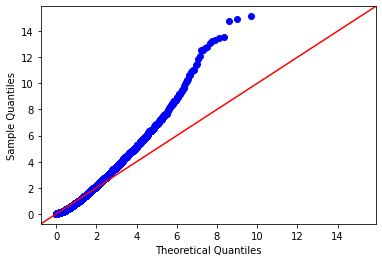

In [14]:
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)
iat = np.diff(np.insert(ts, 0, 0))

a=1/sum(iat)*len(ts)
tsShifted = poisson_compensator(ts, a)
iat = np.diff(np.insert(tsShifted, 0, 0))
qqplot(iat, dist=stats.expon, fit=False, line="45")
plt.show()

In [46]:
T.days

2113

In [47]:
np.log(a)*len(ts)-a*T.days

17401.37653942171

In [38]:
a

60.717463870761215

<AxesSubplot:xlabel='F_k', ylabel='F_k+1'>

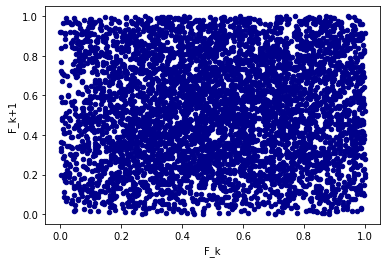

In [120]:
a=pd.DataFrame(((1-np.exp(-iat))[1:5000]))
a.rename(columns = {0:'F_k+1'}, inplace = True)
b=pd.DataFrame(((1-np.exp(-iat))[0:5000-1]))
b.rename(columns = {0:'F_k'}, inplace = True)
df=pd.concat([a,b],axis=1)
df.plot.scatter(x='F_k',
                      y='F_k+1',
                      c='DarkBlue')

In [100]:
df

,F_k+1,F_k
0,0.587333,0.481086
1,0.115937,0.587333
2,0.199519,0.115937
3,0.405450,0.199519
4,0.383709,0.405450
...,...,...
1994,0.220249,0.262383
1995,0.094946,0.220249
1996,0.367245,0.094946
1997,0.171872,0.367245


<AxesSubplot:xlabel='F_k', ylabel='F_k+1'>

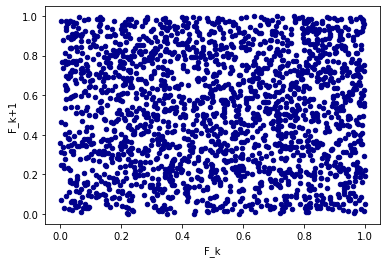

In [8]:
tsShifted

array([6.56016433e-01, 1.54113110e+00, 1.66435791e+00, ...,
       1.11708128e+04, 1.11708255e+04, 1.11719999e+04])

In [11]:
ts

array([1.65393519e-02, 3.71180556e-02, 3.97800926e-02, ...,
       1.83981620e+02, 1.83981817e+02, 1.83999780e+02])

# Test Poisson Homogeneo

In [416]:
𝛉2=np.array([7.21109496,6.328806147,6.711610368])
terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-10 oct 2017 todas magnitudes.csv")

#terremotos = pd.read_csv("D:/Hawkes Process/Sismos base de datos final sismos mayores a 3.9.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

In [417]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("8/01/2017")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)

# Calculate the length of the observation period
T = pd.Timestamp("10/10/2017")- pd.Timestamp("8/01/2017")

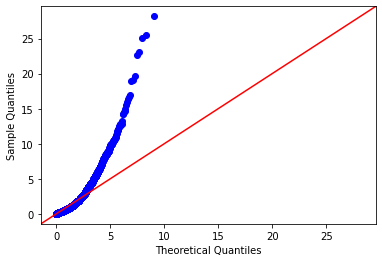

In [418]:
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)
iat = np.diff(np.insert(ts, 0, 0))

a=1/sum(iat)*len(ts)
# Calculate the length of the observation period
T = pd.Timestamp("10/10/2017")- pd.Timestamp("08/01/2017")
tsShifted = poisson_compensator(ts, a)
iat = np.diff(np.insert(tsShifted, 0, 0))
qqplot(iat, dist=stats.expon, fit=False, line="45")
plt.show()

In [353]:
max(iat)

28.178891970886752

In [419]:
pd.DataFrame(iat).mean()

0    1.0
dtype: float64

In [420]:
𝛉3=np.array([1.56518564,0.768675691,0.961173259])
terremotos = pd.read_csv("D:/Hawkes Process/Sismo ago-15 may 2023 magnitudes m o igual 4.csv")

#terremotos = pd.read_csv("D:/Hawkes Process/Sismos base de datos final sismos mayores a 3.9.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

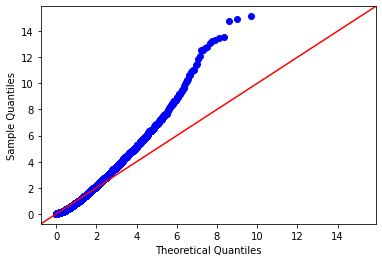

In [421]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("8/01/2017")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)
iat = np.diff(np.insert(ts, 0, 0))

a=1/sum(iat)*len(ts)
# Calculate the length of the observation period
T = pd.Timestamp("5/15/2023")- pd.Timestamp("7/01/2017")
tsShifted = poisson_compensator(ts, a)
iat = np.diff(np.insert(tsShifted, 0, 0))
qqplot(iat, dist=stats.expon, fit=False, line="45")
plt.show()

In [422]:
pd.DataFrame(iat).mean()

0    1.0
dtype: float64

In [402]:
terremotos = pd.read_csv("D:/Hawkes Process/Base de datos Sismos 2020 2 S.csv")

#terremotos = pd.read_csv("D:/Hawkes Process/Sismos base de datos final sismos mayores a 3.9.csv")
terremotos.index = pd.to_datetime(terremotos.D.astype(str) + "/" + terremotos.M.astype(str) + "/" + terremotos.A.astype(str) + " " + terremotos.Hora, dayfirst=True)

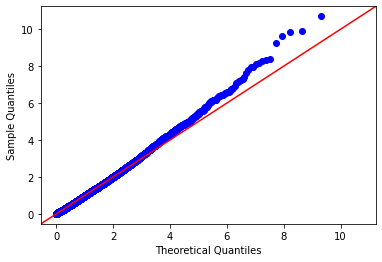

In [403]:
terremotos.sort_index(inplace=True)

# Calculate each arrival as a (fractional) number of days since the
# beginning of the observation period
tiempo_inter_terremoto = terremotos.index - pd.Timestamp("7/01/2020")
ts = np.array(tiempo_inter_terremoto.total_seconds() / 60 / 60 / 24)
iat = np.diff(np.insert(ts, 0, 0))

a=1/sum(iat)*len(ts)
# Calculate the length of the observation period
T = pd.Timestamp("1/1/2021")- pd.Timestamp("7/01/2020")
tsShifted = poisson_compensator(ts, a)
iat = np.diff(np.insert(tsShifted, 0, 0))
qqplot(iat, dist=stats.expon, fit=False, line="45")
plt.show()

In [381]:
iat

array([1.0042275 , 1.2494867 , 0.16163214, ..., 0.35980719, 0.01194672,
       1.09066555])

In [405]:
tsShifted.sort()

In [406]:
s=pd.DataFrame(tsShifted)

In [392]:
pd.DataFrame(s).to_csv("D:/Hawkes Process/prueba.csv")

In [400]:
a

120.38450683764991

In [407]:
s.mean()

0    5740.225422
dtype: float64

In [409]:
iat = np.diff(np.insert(tsShifted, 0, 0))

In [412]:
pd.DataFrame(iat).mean()

0    1.0
dtype: float64

In [413]:
iat

array([1.0042275 , 1.2494867 , 0.16163214, ..., 0.35980719, 0.01194672,
       1.09066555])

# Intervalo Empírico Poisson Homogéneo

In [474]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [486]:
def poisson_homogeneo(T,lambda_) :
    k=0
    Tarribo=[]
    Tarribo.append(np.random.exponential(scale=1/lambda_, size=None))
    while Tarribo[k]< T:
        Tarribo.append(Tarribo[k]+ np.random.exponential(scale=1/lambda_, size=None) )
        k=k+1
    return(Tarribo)

In [500]:
my_df  = pd.DataFrame()
lambda_=120.3845 #Base de datos 1
#lambda_= 7.807 #Base de datos 2
#lambda_= 60.7174 # Base de datos 3

T = pd.Timestamp("10/11/2017")- pd.Timestamp("8/01/2017")
#T = pd.Timestamp("05/15/2023")-pd.Timestamp("8/01/2017")
#T = pd.Timestamp("1/1/2021")- pd.Timestamp("7/01/2020")
T = float(T.days)
for x in range(0,200):
    
    simular_sismos_3=poisson_homogeneo(T,lambda_)
    tiempos_simulados_convertidos=[]
    m_simulado=[]
    d_simulado=[]
    a_simulado=[]
    fecha_simulada=[]
    for x in range(0,len(simular_sismos_3)):
        tiempos_simulados_convertidos.append(pd.Timestamp("8/01/2017")+ datetime.timedelta(days=simular_sismos_3[x]))
        d_simulado.append(tiempos_simulados_convertidos[x].day)
        m_simulado.append(tiempos_simulados_convertidos[x].month)
        a_simulado.append(tiempos_simulados_convertidos[x].year)
        fecha_simulada.append(datetime.datetime(a_simulado[x], m_simulado[x], d_simulado[x]).date())
    
    t_simulados=pd.DataFrame(tiempos_simulados_convertidos)
    t_simulados.rename(columns = {0:'t_simulados'}, inplace = True)
    d_simulado=pd.DataFrame(d_simulado)
    d_simulado.rename(columns = {0:'d_simulado'}, inplace = True)
    m_simulado=pd.DataFrame(m_simulado)
    m_simulado.rename(columns = {0:'m_simulado'}, inplace = True)
    a_simulado=pd.DataFrame(a_simulado)
    a_simulado.rename(columns = {0:'a_simulado'}, inplace = True)
    fecha_simulada=pd.DataFrame(fecha_simulada)
    fecha_simulada.rename(columns = {0:'fecha_simulada'}, inplace = True)
    panda_simulado=pd.concat([fecha_simulada], axis=1)
    my_df=pd.concat([my_df,panda_simulado],axis=1)

In [485]:
simular_sismos_3=poisson_homogeneo(T,lambda_)
        

IndexError: list index out of range

In [494]:
my_df

,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,...,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada,fecha_simulada
0,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
1,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
2,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
3,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
4,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,...,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
my_df.to_csv("D:/Hawkes Process/Simulacion_Poisson_Homogeneo_base1.csv")